In [3]:
import pandas as pd
with open("negatives_lightcurves_grouped_r_clean.parquet", "rb") as f:
    print(f.read(10))



b'object,oid'


In [4]:
df = pd.read_csv("negatives_lightcurves_grouped_r_clean.parquet")  # still works even if extension is .parquet


In [10]:
import pandas as pd

# Load your parquet file
df = pd.read_csv("negatives_lightcurves_grouped_r_clean.parquet")

# Check shape and columns
print(df_neg.shape)
print(df_neg.columns)


(1471, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [7]:
import pandas as pd

# Load your parquet file
df_neg = pd.read_csv("lightcurve_features_26_negative.parquet")

# Check shape and columns
print(df_neg.shape)
print(df_neg.columns)


(1471, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [11]:
# Assuming first column is object name / ID
features_neg = df_neg.drop(columns=['object_name'], errors='ignore')


In [12]:
# Automatically select only numeric columns
features_neg_numeric = features_neg.select_dtypes(include='number')



In [27]:
corr_neg = features_neg_numeric.corr()


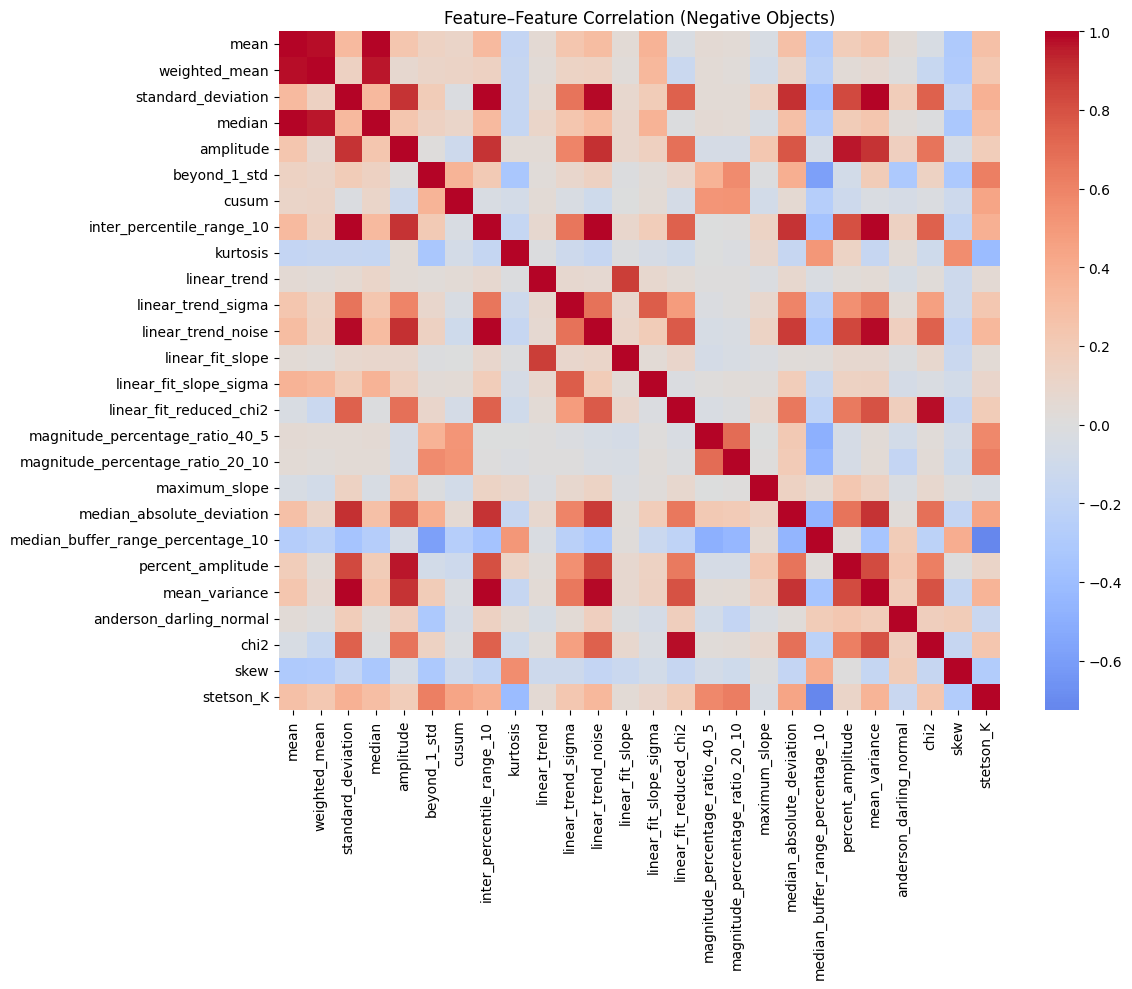

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_neg, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (Negative Objects)')
plt.tight_layout()
plt.show()


In [38]:
print(features_neg_numeric.columns.tolist())


['mean', 'weighted_mean', 'standard_deviation', 'median', 'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10', 'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise', 'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2', 'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10', 'maximum_slope', 'median_absolute_deviation', 'median_buffer_range_percentage_10', 'percent_amplitude', 'mean_variance', 'anderson_darling_normal', 'chi2', 'skew', 'stetson_K']


In [35]:
import numpy as np

# Compute correlation matrix (assuming your df is features_neg_numeric)
corr_neg = features_neg_numeric.corr()

# Convert to long format
corr_pairs = corr.unstack().sort_values(ascending=False)

# Drop self-correlations (feature with itself)
corr_pairs = corr_pairs[corr_pairs < 0.9999]

# Select strong correlations (absolute correlation > 0.7)
high_corr = corr_pairs[abs(corr_pairs) > 0.7]

print("Highly correlated feature pairs:")
print(high_corr)


Highly correlated feature pairs:
chi2                               linear_fit_reduced_chi2              0.995884
linear_fit_reduced_chi2            chi2                                 0.995884
standard_deviation                 mean_variance                        0.994173
mean_variance                      standard_deviation                   0.994173
median                             mean                                 0.991818
mean                               median                               0.991818
linear_trend_noise                 mean_variance                        0.980368
mean_variance                      linear_trend_noise                   0.980368
standard_deviation                 linear_trend_noise                   0.980225
linear_trend_noise                 standard_deviation                   0.980225
inter_percentile_range_10          standard_deviation                   0.976591
standard_deviation                 inter_percentile_range_10            0.97

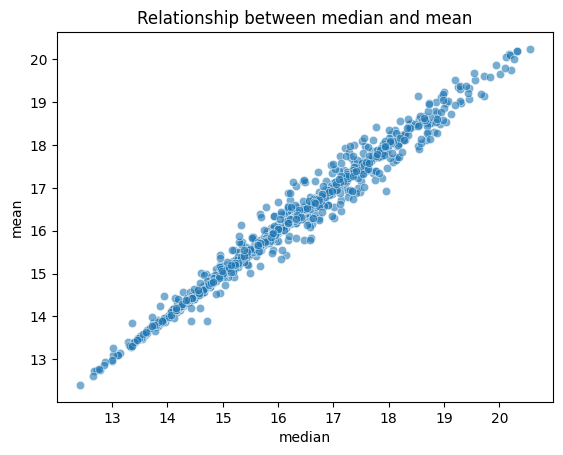

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: plot two correlated features
x_feature = 'median'
y_feature = 'mean'

sns.scatterplot(data=features_neg_numeric, x=x_feature, y=y_feature, alpha=0.6)
plt.title(f'Relationship between {x_feature} and {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


In [19]:
import pandas as pd

# Load your parquet file
df_pos= pd.read_csv("lightcurve_features_26.csv")

# Check shape and columns
print(df_pos.shape)
print(df_pos.columns)

(139, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [20]:
features_pos = df_pos.drop(columns=['object_name'], errors='ignore')


In [22]:
features_pos_numeric = features_pos.select_dtypes(include='number')


In [31]:
corr_pos = features_pos_numeric.corr()

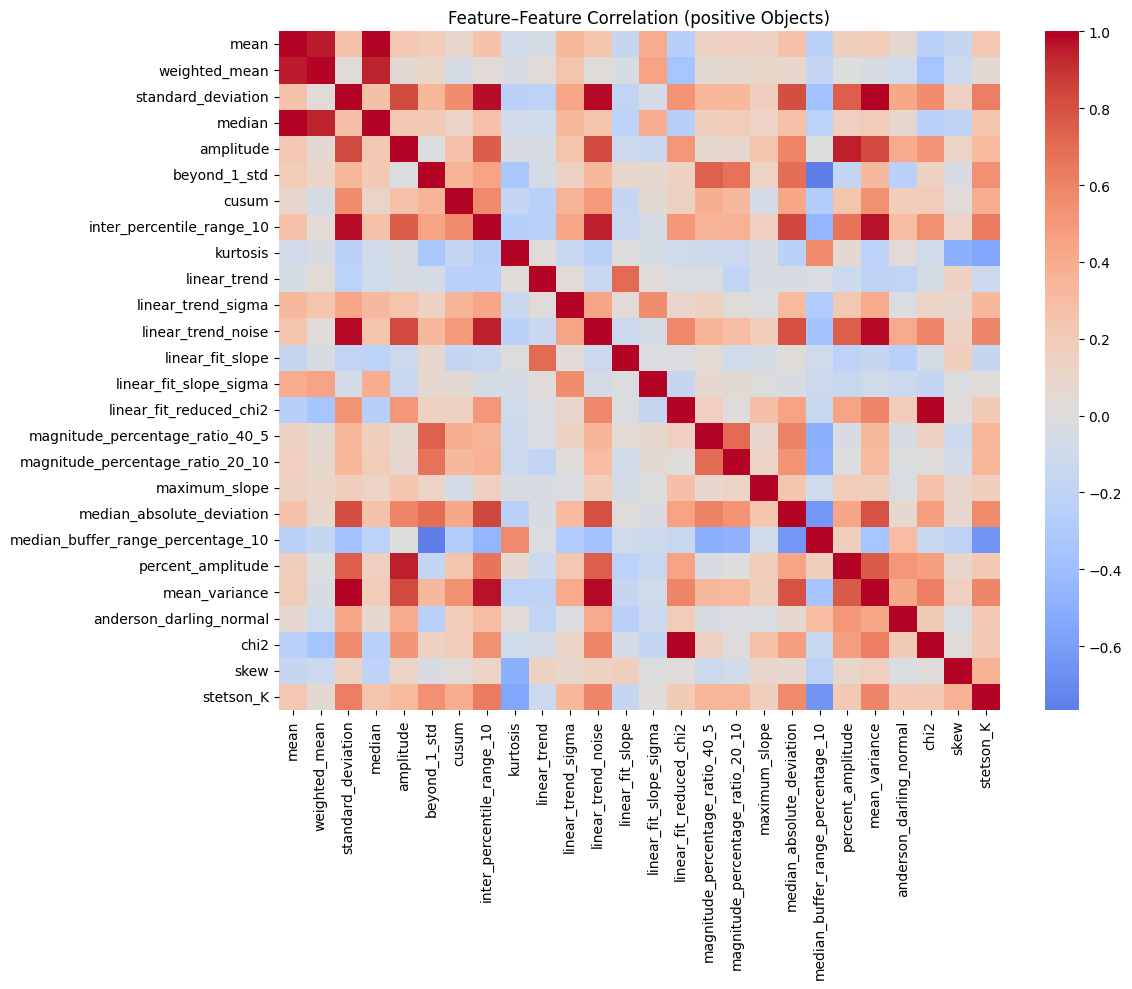

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_pos, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (positive Objects)')
plt.tight_layout()
plt.show()


In [36]:
import numpy as np

# Compute correlation matrix (assuming  df is features_pos_numeric)
corr_pos = features_pos_numeric.corr()

# Convert to long format
corr_pairs = corr.unstack().sort_values(ascending=False)

# Drop self-correlations (feature with itself)
corr_pairs = corr_pairs[corr_pairs < 0.9999]

# Select strong correlations (absolute correlation > 0.7)
high_corr = corr_pairs[abs(corr_pairs) > 0.7]

print("Highly correlated feature pairs:")
print(high_corr)


Highly correlated feature pairs:
chi2                               linear_fit_reduced_chi2              0.995884
linear_fit_reduced_chi2            chi2                                 0.995884
standard_deviation                 mean_variance                        0.994173
mean_variance                      standard_deviation                   0.994173
median                             mean                                 0.991818
mean                               median                               0.991818
linear_trend_noise                 mean_variance                        0.980368
mean_variance                      linear_trend_noise                   0.980368
standard_deviation                 linear_trend_noise                   0.980225
linear_trend_noise                 standard_deviation                   0.980225
inter_percentile_range_10          standard_deviation                   0.976591
standard_deviation                 inter_percentile_range_10            0.97

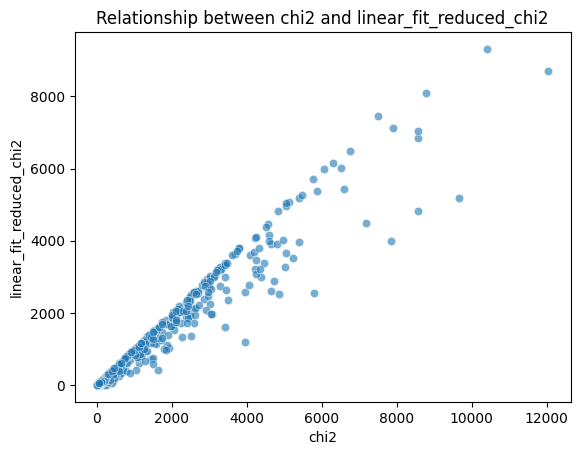

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: plot two correlated features
x_feature = 'chi2'
y_feature = 'linear_fit_reduced_chi2'

sns.scatterplot(data=features_neg_numeric, x=x_feature, y=y_feature, alpha=0.6)
plt.title(f'Relationship between {x_feature} and {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

In [33]:
# corr_cv and corr_neg are correlation matrices
corr_diff = corr_pos - corr_neg


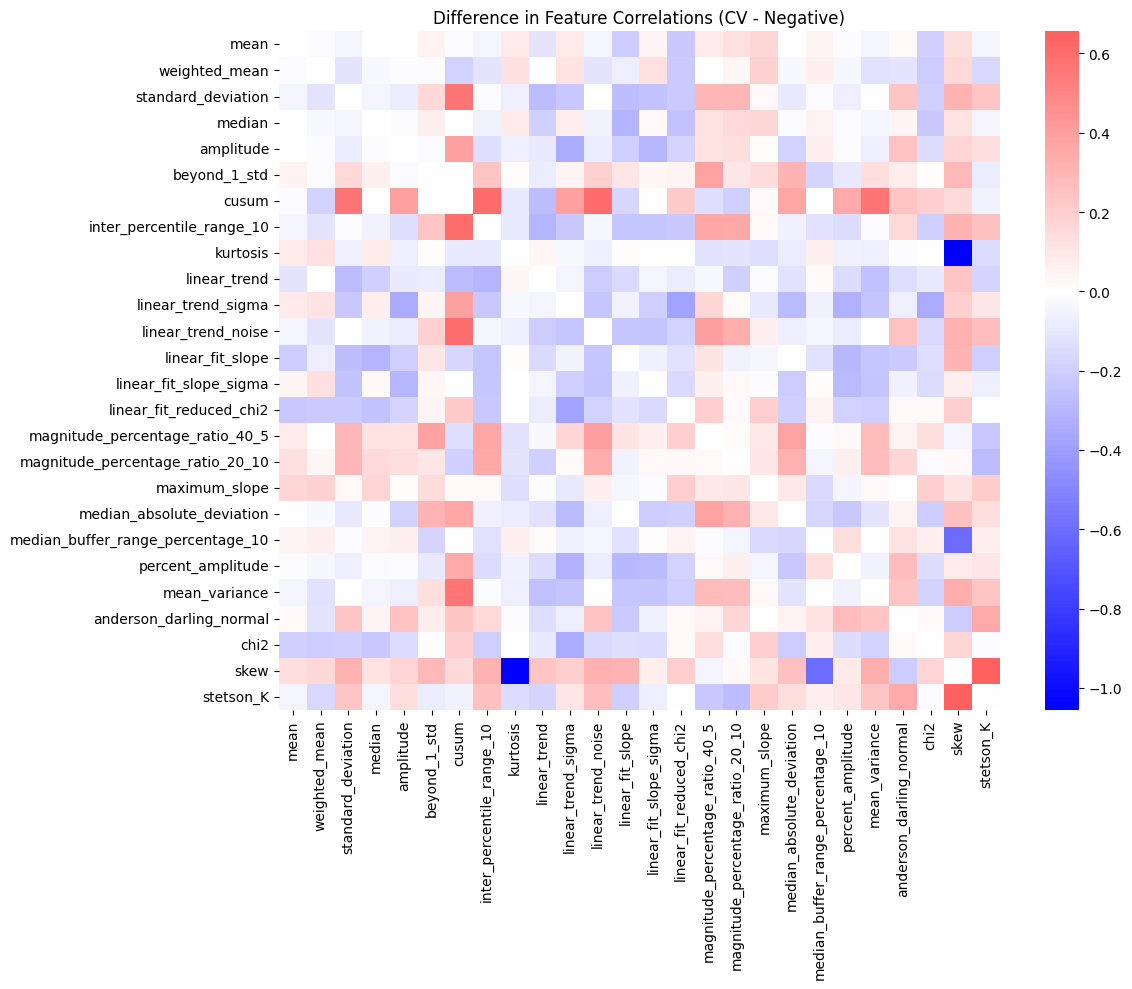

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (CV - Negative)')
plt.tight_layout()
plt.show()
